In [17]:
import numpy as np
import pandas as pd
import os
import timeit
import time

#import urllib2
import datetime
#from itertools import ifilter
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

from bs4 import BeautifulSoup
import matplotlib.pylab as plt
#import bibtexparser

pd.set_option('mode.chained_assignment','warn')

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [18]:
OAI = "{http://www.openarchives.org/OAI/2.0/}"
ARXIV = "{http://arxiv.org/OAI/arXiv/}"

def harvest(arxiv="physics:hep-ex"):
    df = pd.DataFrame(columns=("title", "abstract", "categories", "created", "id", "doi"))
    base_url = "http://export.arxiv.org/oai2?verb=ListRecords&"
    url = (base_url +
           "from=2010-01-01&until=2014-12-31&" +
           "metadataPrefix=arXiv&set=%s"%arxiv)
    
    while True:
        print "fetching", url
        try:
            response = urllib2.urlopen(url)
            
        except urllib2.HTTPError, e:
            if e.code == 503:
                to = int(e.hdrs.get("retry-after", 30))
                print "Got 503. Retrying after {0:d} seconds.".format(to)

                time.sleep(to)
                continue
                
            else:
                raise
            
        xml = response.read()

        root = ET.fromstring(xml)

        for record in root.find(OAI+'ListRecords').findall(OAI+"record"):
            arxiv_id = record.find(OAI+'header').find(OAI+'identifier')
            meta = record.find(OAI+'metadata')
            info = meta.find(ARXIV+"arXiv")
            created = info.find(ARXIV+"created").text
            created = datetime.datetime.strptime(created, "%Y-%m-%d")
            categories = info.find(ARXIV+"categories").text

            # if there is more than one DOI use the first one
            # often the second one (if it exists at all) refers
            # to an eratum or similar
            doi = info.find(ARXIV+"doi")
            if doi is not None:
                doi = doi.text.split()[0]
                
            contents = {'title': info.find(ARXIV+"title").text,
                        'id': info.find(ARXIV+"id").text,#arxiv_id.text[4:],
                        'abstract': info.find(ARXIV+"abstract").text.strip(),
                        'created': created,
                        'categories': categories.split(),
                        'doi': doi,
                        }

            df = df.append(contents, ignore_index=True)

        # The list of articles returned by the API comes in chunks of
        # 1000 articles. The presence of a resumptionToken tells us that
        # there is more to be fetched.
        token = root.find(OAI+'ListRecords').find(OAI+"resumptionToken")
        if token is None or token.text is None:
            break

        else:
            url = base_url + "resumptionToken=%s"%(token.text)
            
    return df
    

done


In [1]:
df1 = harvest('Support Vector Machines)
df2 = harvest('Adaptive Filters)

The following keyword extracted: Support Vector Machines
The following keyword extracted: Adaptive Filters


In [9]:
objects2 = ('Kalman Filter','Reverberant','Transfer Function','Signal Processing','Filter','Harmonic','Loss Function','Wiener Filter','Optimizaiton Algorithm','Finite Impulse Response','Digital Filter')
freq2 = [928,890,690,655,631,585,423,345,311,288,212]
objects1 = ('Outline of Machine learning', 'Data Clustering','Cluster Analysis','Princial Componenet Analysis','Logistic Regression','Linear Regression','Regression Analysis','Linear Discriminant Analysis','Binary Classifier','Neueral Network','Graphic Model','Statistical Classification')
freq1 = [1017,716,650,604,530,509,480,340,235,180,129,11]



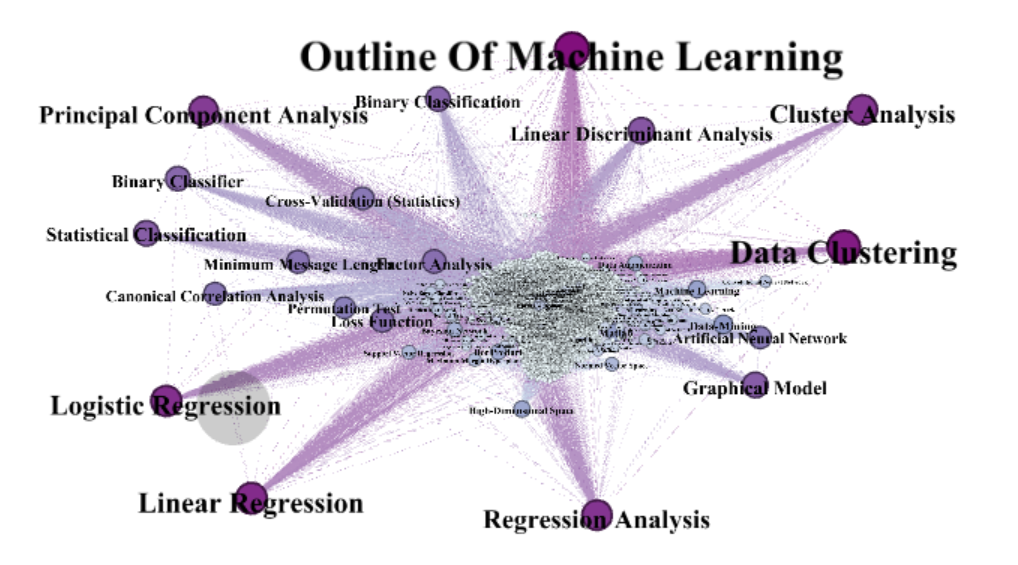

In [22]:
from IPython.display import Image
Image("svm.png")

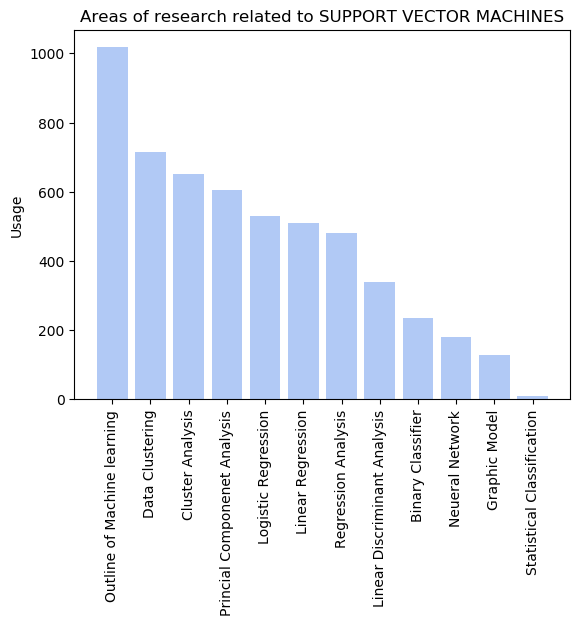

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 

y_pos = np.arange(len(objects1))

fig = plt.figure()
ax = fig.add_subplot(111)

plt.bar(y_pos, freq1, align='center', alpha=0.5, color='cornflowerblue')
plt.xticks(y_pos, objects1,rotation='vertical')
plt.ylabel('Usage')
plt.title('Areas of research related to SUPPORT VECTOR MACHINES')
plt.show()



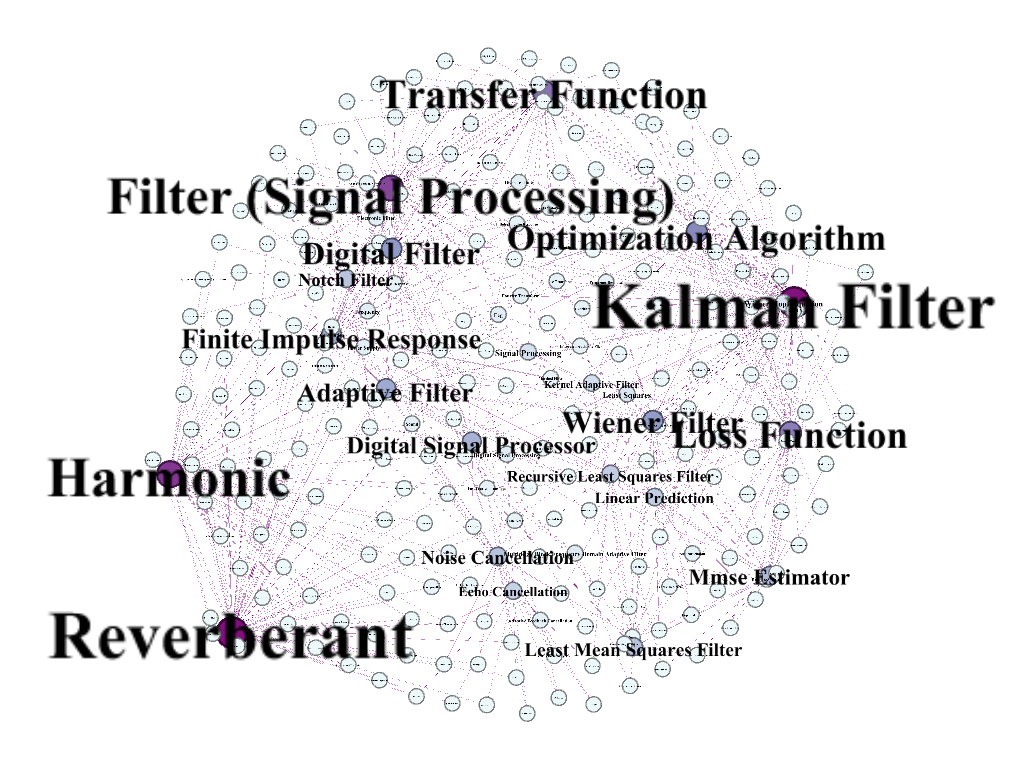

In [21]:
from IPython.display import Image
Image("adaptive.png")

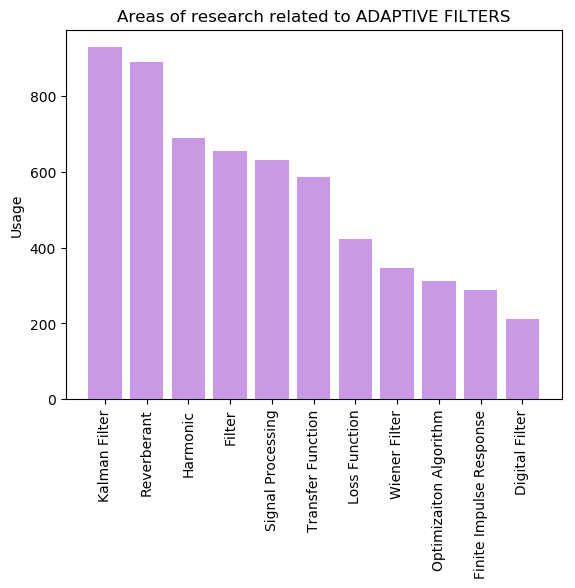

In [51]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(objects2))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(y_pos, freq2, align='center', alpha=0.5,color='darkorchid')
plt.xticks(y_pos, objects2, rotation='vertical')
plt.ylabel('Usage')
plt.title('Areas of research related to ADAPTIVE FILTERS')
plt.show()